In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline
sns.set(color_codes=True)

# Data Description

In [86]:
Products_data=pd.read_csv('ProductsData.csv')
Products_data.index=range(1,len(Products_data)+1)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
4,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
5,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [87]:
Products_data.shape

(4350, 7)

In [88]:
Products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 1 to 4350
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [89]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39242063""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


# Data Cleaning

**Removing all the double quotes from each element in the features**

In [90]:
for i,col in enumerate(Products_data.columns):
    Products_data.iloc[:,i]=Products_data.iloc[:,i].str.replace('"','')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all empty string values with NaN**

In [91]:
Products_data=Products_data.replace(r'^\s*$',np.NaN,regex=True)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all the unwanted strings with NaN**

In [92]:
Products_data['Product_name'] = Products_data['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Removing all the unwanted space in price column**

In [93]:
Products_data['price'] = Products_data['price'].str.replace(' ', '')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [94]:
print(Products_data.isnull().sum())

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64


**The Price column having missing values can be used as test set, which will we evaluated by the model.**
**The rows with product name as missing values need to be removed, as they will not be useful in evaluation, as they are meaningless.**

In [95]:
i=Products_data['Product_name'].isnull()
data=Products_data[i]
data.shape

(380, 7)

In [96]:
Products_data=Products_data.drop(data.index,axis=0)
Products_data.shape

(3970, 7)

### Separating Test Data from the original Product Dataset

In [97]:
test_data=Products_data[Products_data.isnull().any(axis=1)]
test_data.shape

(1076, 7)

In [98]:
test_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
7,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
10,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca


In [99]:
test_data.index=range(1,len(test_data)+1)
test_data=test_data.drop('price',axis=1)
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat
4,becane,40008811,Motos,private,Fès-Boulemane,Fès
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca


In [100]:
data=test_data.drop_duplicates(subset=None,keep='first',inplace=False)
print('Shape of Original dataset:',test_data.shape)
print('Shape of dataset after dropping duplicates:',data.shape)

Shape of Original dataset: (1076, 6)
Shape of dataset after dropping duplicates: (923, 6)


#### Since, Rows in the test dataset after dropping duplicates is less than the original test dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [101]:
test_data=data
test_data.shape

(923, 6)

### Dropping the rows with missing values in target variable

In [102]:
Products_data.dropna(axis=0, subset=['price'], inplace=True)

In [103]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2894,2894,2894,2894,2894,2894,2894
unique,2331,2501,42,507,2,16,98
top,Renault,39242049,Voitures,300,private,Grand Casablanca,Casablanca
freq,16,3,448,98,1827,915,849


In [104]:
print(Products_data.isnull().sum())

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64


In [105]:
Products_data.shape

(2894, 7)

In [106]:
Products_data.index=range(1,len(Products_data)+1)

In [107]:
without_duplicate_data=Products_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',Products_data.shape)
print('Shape of dataset after dropping duplicates:',without_duplicate_data.shape)

Shape of Original dataset: (2894, 7)
Shape of dataset after dropping duplicates: (2501, 7)


#### Since, Rows in the Product dataset after dropping duplicates is less than the original Product dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [108]:
Products_data=without_duplicate_data
Products_data.shape

(2501, 7)

In [109]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2501,2501,2501,2501,2501,2501,2501
unique,2331,2501,42,507,2,16,98
top,Renault,39236561,Voitures,300,private,Grand Casablanca,Casablanca
freq,13,1,378,91,1558,793,739


# Model

In [130]:
X=Products_data.drop(['price'],axis=1)
Y=Products_data['price']
X_train,X_valid,Y_train,Y_valid=train_test_split(X_copy,Y,test_size=0.2,random_state=0)

**Label Encoding**

In [131]:
cat_col=['Product_name','Product_Category','Professional_Publication','Region_address','Local_address']
num_col=['Product_id']

X_train_copy=X_train.copy()
X_copy=X_train.copy()
ordinal_encoder=OrdinalEncoder()
X_copy[cat_col]=ordinal_encoder.fit_transform(X_train[cat_col])
X_copy[num_col]=X_train[num_col]

**Scaling the features**

In [132]:
X_scale_train=pd.DataFrame(scale(X_train))
X_scale_train.columns=X_train.columns
X_scale_valid=pd.DataFrame(scale(X_valid))
X_scale_valid.columns=X_valid.columns
X_scale_valid.index=range(1,len(X_scale_valid)+1)

### Linear Regression

In [133]:
model_LR=LinearRegression()
model_LR.fit(X_scale_train,Y_train)
Y_pred_LR=model_LR.predict(X_scale_valid)

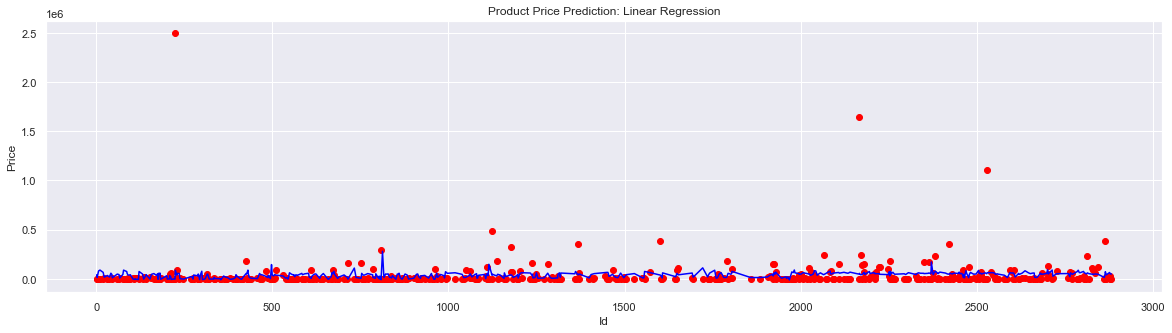

In [134]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LR, color = 'blue')
plt.title('Product Price Prediction: Linear Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [135]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LR))
print('Linear Regression Coefficients:',model_LR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LR)*100)/(mean_squared_error(Y_valid,Y_pred_LR)+mean_absolute_error(Y_valid,Y_pred_LR)))

Mean Absolute Error: 54734.79893339306
Linear Regression Coefficients: [  4067.83581199 -18537.08148358  -4170.92015394 -18529.96350117
   7882.23575552 -12192.58379042]
R2 Score: -0.0026346917168460493
Mean Squared Error: 23234632070.370255
Final Score: -1.1339475926397641e-11


### Logistic Regression

In [136]:
model_LGR=LogisticRegression()
model_LGR.fit(X_scale_train,Y_train)
Y_pred_LGR=model_LGR.predict(X_scale_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


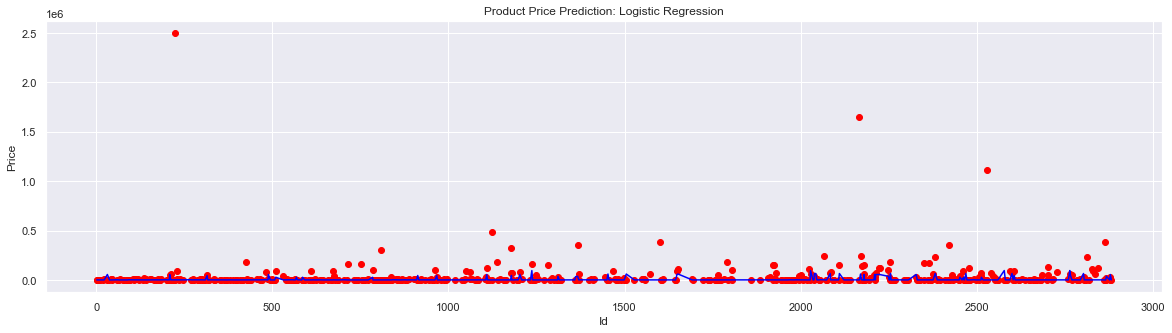

In [137]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LGR, color = 'blue')
plt.title('Product Price Prediction: Logistic Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [138]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGR))
print('Linear Regression Coefficients:\n',model_LGR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LGR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGR)*100)/(mean_squared_error(Y_valid,Y_pred_LGR)+mean_absolute_error(Y_valid,Y_pred_LGR)))

Mean Absolute Error: 32590.526946107784
Linear Regression Coefficients:
 [[ 0.57343944 -0.26873076 -0.26297598 -0.93005312 -0.39769021  0.42460198]
 [ 0.68845136 -0.13709712 -1.08952284 -0.40640643  0.05783285  0.2097677 ]
 [ 0.84311737 -0.47140541  0.56621348  0.77300558 -0.32787778 -0.42618356]
 ...
 [ 0.36411916 -0.12384408 -0.3104536  -0.4349209  -0.32071951 -0.44239678]
 [ 0.68161707 -0.14391273 -0.31431031 -0.36055912  0.71162719 -0.81754565]
 [ 0.95090157  0.18423478 -0.3064027  -0.40516364  0.69908706  0.64680695]]
R2 Score: -0.03122870736746952
Mean Squared Error: 23897257689.197605
Final Score: -1.3067886359469486e-10


### Kernel Ridge Regression

In [139]:
model_KRR=KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
model_KRR.fit(X_scale_train,Y_train)
Y_pred_KRR=model_KRR.predict(X_scale_valid)

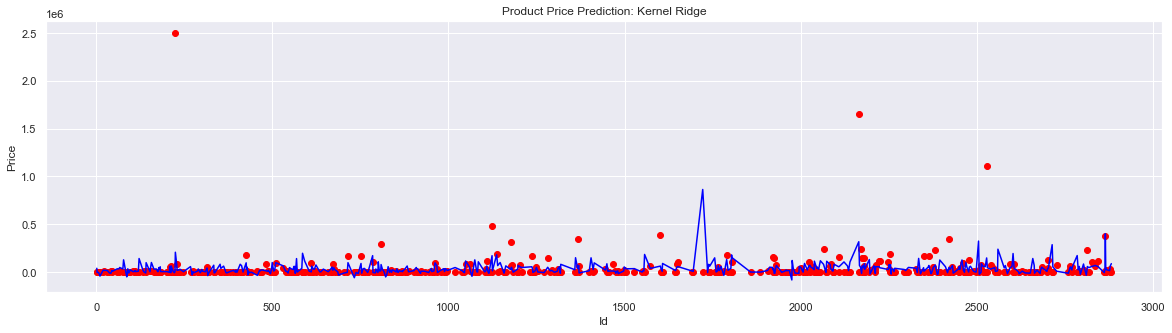

In [140]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color='red')
sns.lineplot(X_valid.index,Y_pred_KRR, color='blue')
plt.title('Product Price Prediction: Kernel Ridge')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [141]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_KRR))
print('R2 Score:',r2_score(Y_valid,Y_pred_KRR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_KRR))
print('Final Score:',(r2_score(Y_valid,Y_pred_KRR)*100)/(mean_squared_error(Y_valid,Y_pred_KRR)+mean_absolute_error(Y_valid,Y_pred_KRR)))

Mean Absolute Error: 49940.906857801936
R2 Score: 0.07499918734424516
Mean Squared Error: 21435577408.605682
Final Score: 3.4988100008162664e-10


### XGBoost Regressor

In [142]:
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_XGB.fit(X_scale_train, Y_train, early_stopping_rounds=5, eval_set=[(X_scale_valid, Y_valid)], verbose=False)
Y_pred_XGB=model_XGB.predict(X_scale_valid)

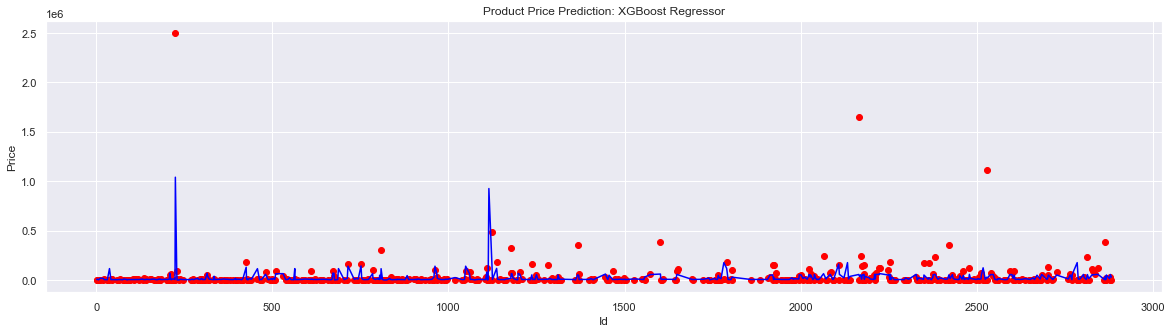

In [143]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_XGB,color='blue')
plt.title('Product Price Prediction: XGBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [144]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_XGB))
print('R2 Score:',r2_score(Y_valid,Y_pred_XGB))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_XGB))
print('Final Score:',(r2_score(Y_valid,Y_pred_XGB)*100)/(mean_squared_error(Y_valid,Y_pred_XGB)+mean_absolute_error(Y_valid,Y_pred_XGB)))

Mean Absolute Error: 31042.433791535583
R2 Score: 0.3137444676862252
Mean Squared Error: 15902995309.551525
Final Score: 1.972860138328688e-09


### Random Forest Regressor

In [145]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_scale_train,Y_train)
Y_pred_RFR=model_RFR.predict(X_scale_valid)

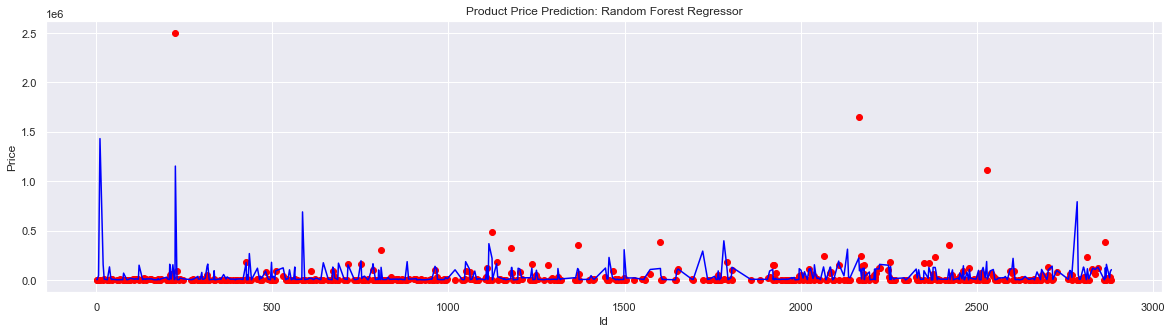

In [146]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_RFR,color='blue')
plt.title('Product Price Prediction: Random Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [147]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_RFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_RFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_RFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_RFR)*100)/(mean_squared_error(Y_valid,Y_pred_RFR)+mean_absolute_error(Y_valid,Y_pred_RFR)))

Mean Absolute Error: 45087.353552894216
R2 Score: 0.14197453549962025
Mean Squared Error: 19883519031.780075
Final Score: 7.14029610833203e-10


### Support Vector Regressor

In [148]:
model_SVR=SVR(kernel='rbf')
model_SVR.fit(X_scale_train,Y_train)
Y_pred_SVR=model_SVR.predict(X_scale_valid)

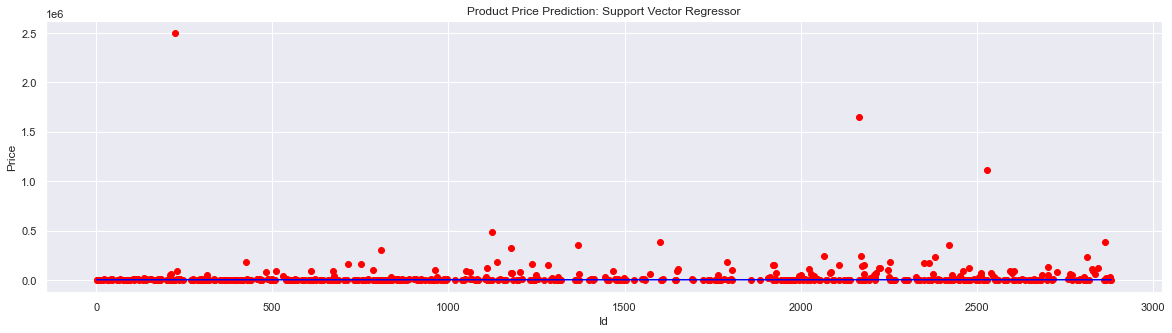

In [149]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_SVR,color='blue')
plt.title('Product Price Prediction: Support Vector Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [150]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_SVR))
print('R2 Score:',r2_score(Y_valid,Y_pred_SVR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_SVR))
print('Final Score:',(r2_score(Y_valid,Y_pred_SVR)*100)/(mean_squared_error(Y_valid,Y_pred_SVR)+mean_absolute_error(Y_valid,Y_pred_SVR)))

Mean Absolute Error: 34037.63516031823
R2 Score: -0.04639285849695862
Mean Squared Error: 24248665310.601425
Final Score: -1.9132101821507556e-10


### Isolation Forest Regressor 

In [151]:
model_IFR = IsolationForest()
model_IFR.fit(X_scale_train)
Y_pred_IFR=-model_IFR.decision_function(X_scale_valid)

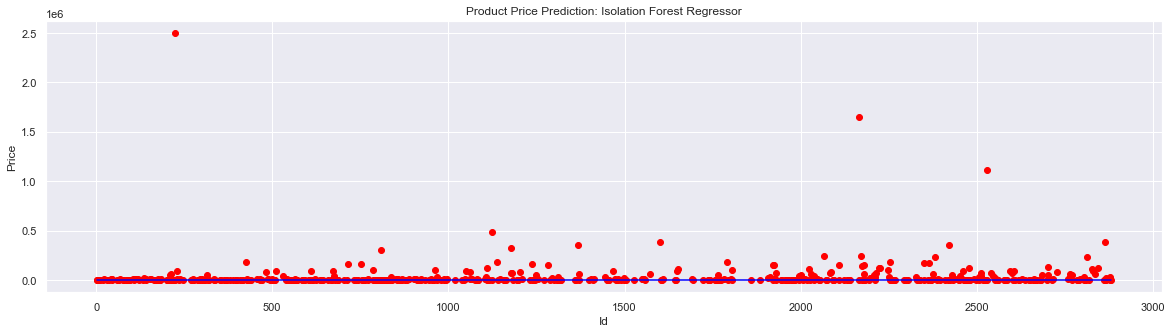

In [152]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_IFR,color='blue')
plt.title('Product Price Prediction: Isolation Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [153]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_IFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_IFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_IFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_IFR)*100)/(mean_squared_error(Y_valid,Y_pred_IFR)+mean_absolute_error(Y_valid,Y_pred_IFR)))

Mean Absolute Error: 34873.577619854346
R2 Score: -0.0524807016999953
Mean Squared Error: 24389742412.853348
Final Score: -2.15174993537938e-10


### Light GBM 

In [154]:
train_X = lgb.Dataset(X_scale_train,label=Y_train)
params = {'learning_rate': 0.05,'application': 'regression','max_depth': 3,'num_leaves': 50,'verbosity': -1,'metric': 'RMSE'}
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)
Y_pred_LGBM = gbm.predict(X_scale_valid, num_iteration=gbm.best_iteration)

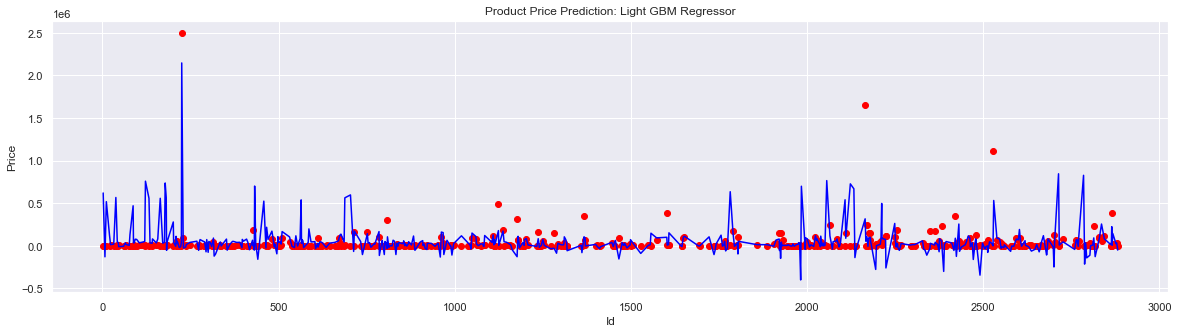

In [155]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_LGBM,color='blue')
plt.title('Product Price Prediction: Light GBM Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [156]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGBM))
print('R2 Score:',r2_score(Y_valid,Y_pred_LGBM))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGBM))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGBM)*100)/(mean_squared_error(Y_valid,Y_pred_LGBM)+mean_absolute_error(Y_valid,Y_pred_LGBM)))

Mean Absolute Error: 84983.95482918626
R2 Score: -0.38778501400658194
Mean Squared Error: 32159942658.679493
Final Score: -1.20579813648076e-09


### CAT Boost Regressor

In [ ]:
train_dataset = cb.Pool(X_scale_train,Y_train) 
test_dataset = cb.Pool(X_scale_valid,Y_valid)
model_CAT = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],'learning_rate': [0.03,0.05,0.1],'depth': [2, 4, 6, 8],'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_CAT.grid_search(grid,train_dataset)
Y_pred_CAT=model_CAT.predict(X_scale_valid)

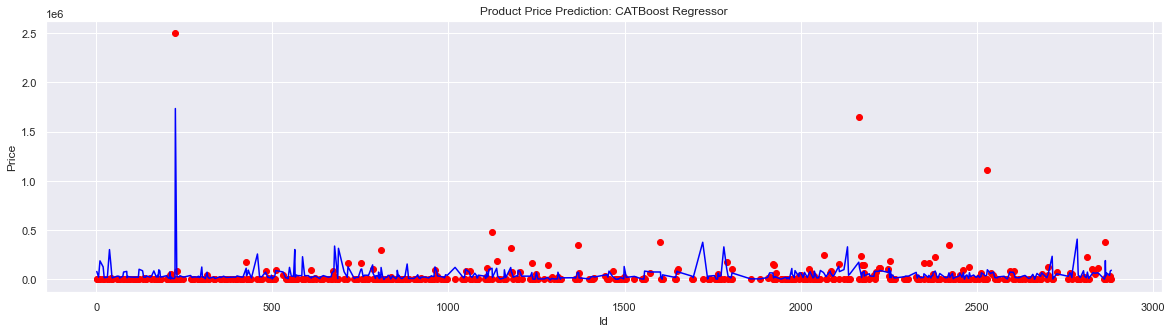

In [158]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_CAT,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [159]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_CAT))
print('R2 Score:',r2_score(Y_valid,Y_pred_CAT))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_CAT))
print('Final Score:',(r2_score(Y_valid,Y_pred_CAT)*100)/(mean_squared_error(Y_valid,Y_pred_CAT)+mean_absolute_error(Y_valid,Y_pred_CAT)))

Mean Absolute Error: 48696.472942350345
R2 Score: 0.44380079463588373
Mean Squared Error: 12889125023.530657
Final Score: 3.443205936057163e-09


Since, final score of **CAT Boost Regressor** is the highest, so concluding this model for price prediction of test dataset.

# Predicting Product price

In [160]:
test=test_data.copy()

ordinal_encoder=OrdinalEncoder()
test[cat_col]=ordinal_encoder.fit_transform(test_data[cat_col])
test[num_col]=test_data[num_col]

In [161]:
test_scale=pd.DataFrame(scale(test))
test_scale.columns=test.columns
test_scale.index=range(1,len(test_scale)+1)

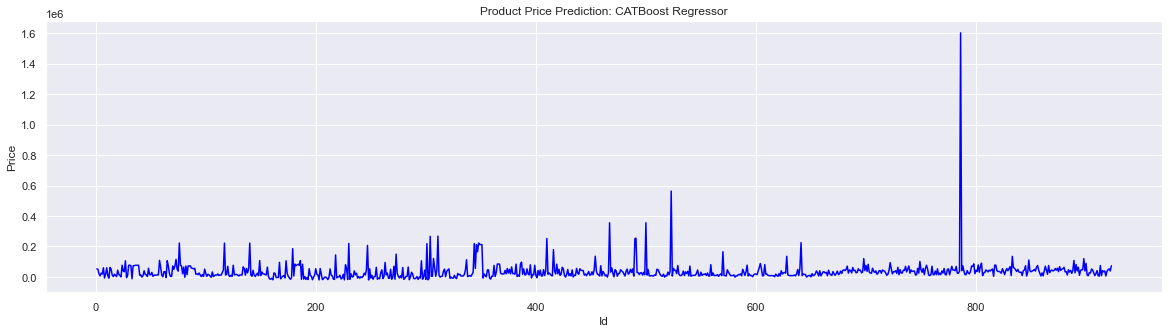

In [162]:
Y_pred_CAT_test=model_CAT.predict(test_scale)
plt.figure(figsize=(20,5))
sns.lineplot(test_scale.index,Y_pred_CAT_test,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [163]:
test_data['price']=Y_pred_CAT_test
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address,price
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca,53165.116736
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca,50487.333996
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat,20699.635376
4,becane,40008811,Motos,private,Fès-Boulemane,Fès,7035.509820
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca,25126.921136
